<a href="https://colab.research.google.com/github/AniB007/Logistic-Regression/blob/main/Logistic_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement : Titanic: Predicting Survival using Supervised Learning**


Titanic Dataset Description

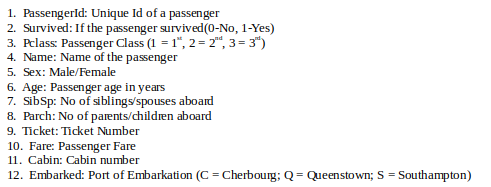

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
# Loading Titanic survival dataset fron seaborn
df = sns.load_dataset('titanic')

In [ ]:
# First View of dataset
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# Checking the null values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Checking total inormation about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Replacing null values of age with zero
df["age"].fillna(0, inplace = True)

In [ ]:
# After replacing values checking for null values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


<Axes: xlabel='age', ylabel='Count'>

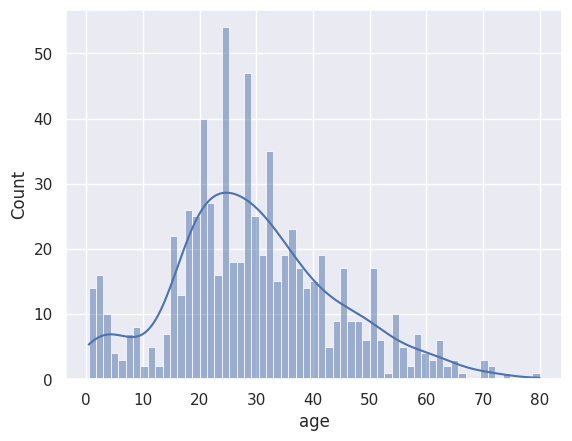

In [ ]:
# age group distribution where 0 means missing age details in dataset was replaced with 0
filtered_df = df[df["age"] != 0]
filtered_df
sns.histplot(filtered_df["age"], bins=61, kde = True)

<Axes: xlabel='survived', ylabel='age'>

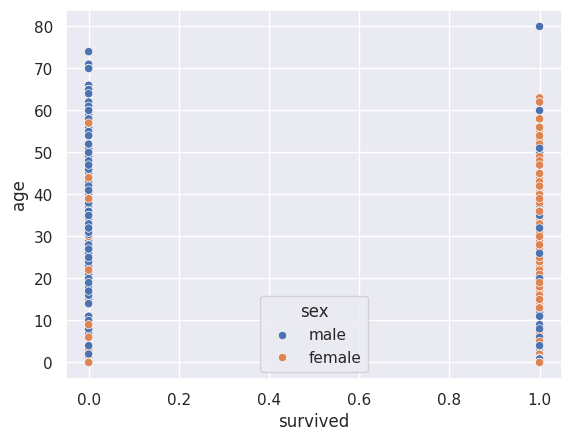

In [ ]:
# Shows realtion between variable
sns.scatterplot(x= "survived",y="age",hue="sex",data= df)

In [ ]:
# Using One-Hot Encoding to convert categories to numerical
encoded_x = pd.get_dummies(df,columns = ["sex","age"])

In [ ]:
# Extended columns
encoded_x.columns

Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck',
       ...
       'age_62.0', 'age_63.0', 'age_64.0', 'age_65.0', 'age_66.0', 'age_70.0',
       'age_70.5', 'age_71.0', 'age_74.0', 'age_80.0'],
      dtype='object', length=104)

In [ ]:
# Dropping columns not required for features
x = encoded_x.drop(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'embarked', 'class','who', 'adult_male', 'deck','embark_town','alive','alone'], axis = 1)

In [ ]:
# Using Survived column as Target variable
y= df["survived"]

In [ ]:
# Splitting data to Train Test Split into 80:20 ratio
# Checking Shape
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 61)
print(x_test.shape,x_train.shape,y_test.shape,y_train.shape)

(179, 91) (712, 91) (179,) (712,)


In [ ]:
# Calulating train values
y_train.value_counts()

,count
survived,
0,432
1,280


In [ ]:
# Calulating test values
y_test.value_counts()

,count
survived,
0,117
1,62


In [ ]:
# Creating Logistic Model
model = LogisticRegression()

In [ ]:
# Fitting Model
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Predicting Model
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [ ]:
# Checking probability model
y_percent_test = model.predict_proba(x_test)
y_percent_train = model.predict_proba(x_train)

In [ ]:
#getting accuracy scores
accuracy = accuracy_score(y_test,y_pred_test)
accuracy

0.7877094972067039

In [ ]:
# Getting F1 score
f1_test = f1_score(y_test,y_pred_test)
f1_test


0.7076923076923077

In [ ]:
# Getting Log Loss Value
from sklearn.metrics import log_loss
logloss = log_loss(y_test,y_percent_test)
logloss

0.5090424590164216

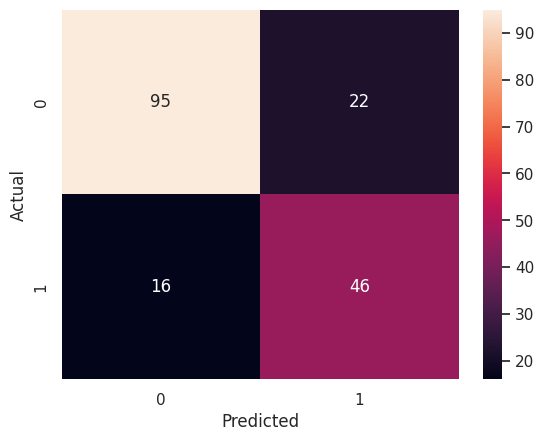

In [ ]:
# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Conclusion

* From this titanic dataset using logistic regression we have to specify Survival rate.

*   I have compared relation between surival rate and features, it was found that sex and age is related.
*   One- Hot Encoding is used in case of Age & Sex to convert categorical values into numerical values.
* The accuracy score is 78% which means its prediction is so far acceptable.
* The Type-1 error is 22 & Type-2 error is 16 which is False Negeative less fatal in case of survival rate, all this is plotted in confusion matrix.

